## 머신러닝
## 회귀분석

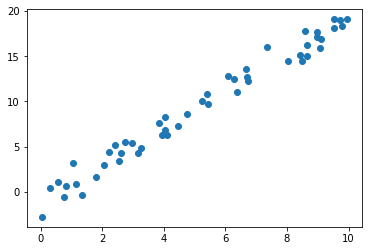

In [3]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(43)
x = 10 * rng.rand(50)
y = 2 *x -1 + rng.randn(50)
plt.scatter(x, y);

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression(fit_intercept = True)
# 절편 사용 여부
# 절편 사용 O = True

In [6]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [7]:
X = x.reshape(50, 1)
X.shape

(50, 1)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(model.coef_)
print(model.intercept_)

[2.01683924]
-1.0244613189684806


### 모델 시각화

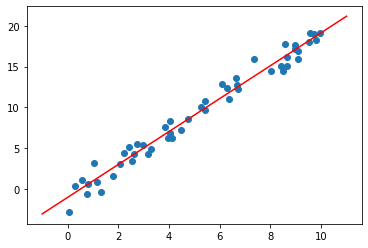

In [10]:
xfit = np.linspace(-1, 11)
plt.scatter(x, y)
plt.plot(xfit, model.coef_ * xfit + model.intercept_, '-r')

In [17]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

### data 생성

In [18]:
import numpy as np
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N) ** 2
    y = 10-1./(X+0.1)
    if err>0:
        y += err * rng.randn(N)
        return X, y
    
X, y = make_data(40)

### data 시각화

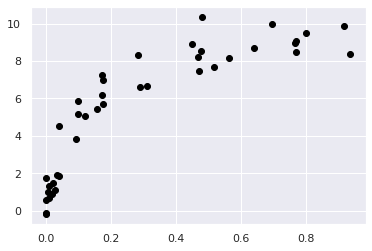

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)
plt.scatter(X, y, color = 'black')
axis = plt.axis()

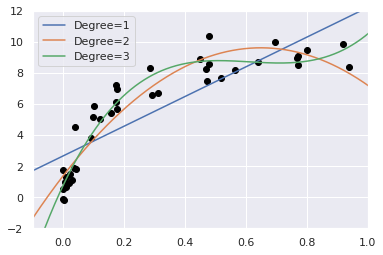

In [20]:
plt.scatter(X,y,color='black')

for degree in [1,2,3]:    
  model=PolynomialRegression(degree)
  model.fit(X[:,np.newaxis],y)
  y_test=model.predict(X_test[:,np.newaxis])
  plt.plot(X_test,y_test,label=f'Degree={degree}')

  plt.axis([-0.1,1.0,-2,12])
  plt.legend(loc='best')